In [1]:
from random import random
import seaborn as sns
from math import log
import numpy as np

# Génération de variables aléatoires à partir d'un générateur uniforme sur $[0,1]$




### Motivation

---


Les générateurs de nombres aléatoires (vus au prochain cours) fournissent des nombres **pseudo-aléatoires** tirés **uniformément** dans l'intervalle $[0,1]$.


In [3]:
for _ in range(10):
    print(random())

0.7866337292719272
0.293351576924052
0.7003405098131883
0.8280649215677969
0.11040245076769495
0.9887731191472812
0.7079589442005313
0.5029068449251562
0.8937952861105443
0.23805477383464813


**Objectifs**: 
* quelle est la loi d'une VA obtenue par un algorithme donné?
* quel algorithme pour obtenir des valeurs suivant une  loi donnée à partir de la fonction `random`?
* coût algorithmique de cette génération?


### Illustration de l'uniformité: histogramme des valeurs

---



<Axes: ylabel='Density'>

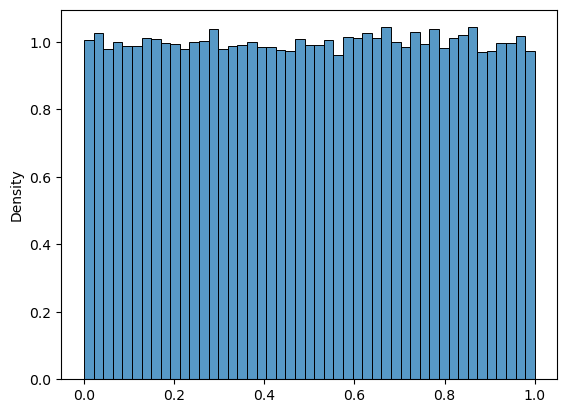

In [6]:
data = []
for _ in range(100000):
    data.append(random())
sns.histplot(data, stat="density")

### Déterminer la loi d'une VA obtenue à partir d'une fonction

---

* $U$ est une VA de loi uniforme sur $[0,1]$
* $f$ fonction de $[0,1]$ dans $\mathbb{R}$
alors $f(U)$ est une VA qui suit une loi qui n'est en général pas uniforme. 

Par exemple $f(x) = x^2$.


<Axes: ylabel='Density'>

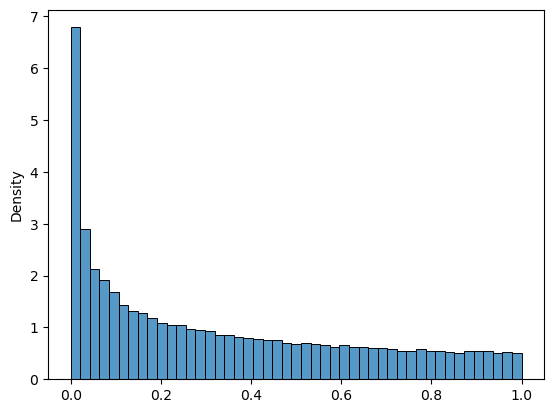

In [7]:
data = []
for _ in range(100000):
    data.append(random()**2)
sns.histplot(data, stat="density")

### Déterminer la loi d'une VA obtenue par un algorithme
---



<Axes: ylabel='Density'>

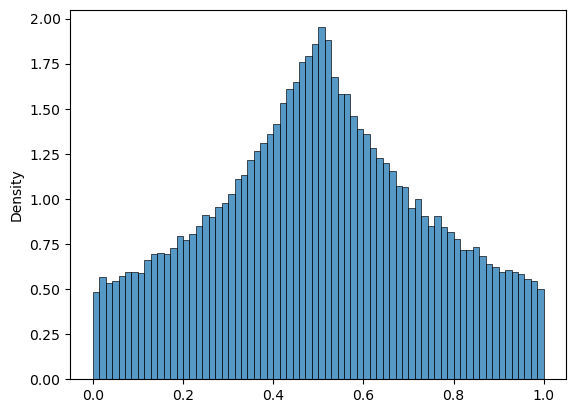

In [10]:
def f(x):
    #return log(x)
    return x

def nb_alea():
    a = f(random())
    b = f(random())
    return a / (a + b)
    
    
data = []
for _ in range(100000):
    data.append(nb_alea())
sns.histplot(data, stat="density")

## Lois discrètes

---

* loi uniforme sur un intervalle d'entiers

* loi quelconque sur un ensemble fini de valeurs

* loi binomiale

* loi géométrique

* ...


### Loi uniforme sur un intervalle d'entiers 

---

Loi uniforme sur l'ensemble des entiers $\{a, \dots, b \}$ (fonction ```randint``` en python).

<Axes: ylabel='Probability'>

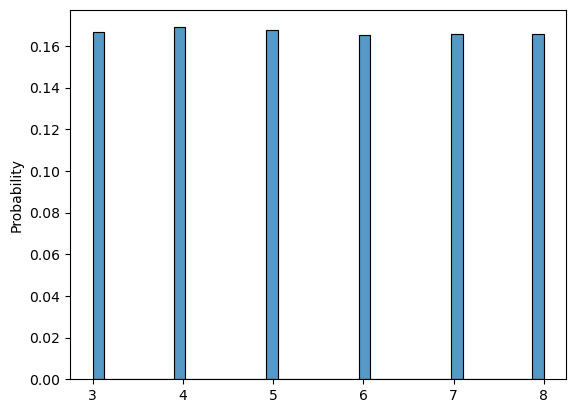

In [11]:
def unif(a, b):
    return (int)((b-a+1) * random()) + a
    
    
data = []
for _ in range(100000):
    data.append(unif(3,8))
sns.histplot(data, stat="probability")

### Loi quelconque sur un ensemble fini de valeurs

---

**Exemple**: on donne la loi suivante


$$ P = 
\begin{array}{l|llll}
 & 1 & 3 & 4 & 8 \\ \hline
\mathbb{P} & 0.1 & 0.05 & 0.1 & 0.75\\ 
\end{array}
$$


<Axes: ylabel='Probability'>

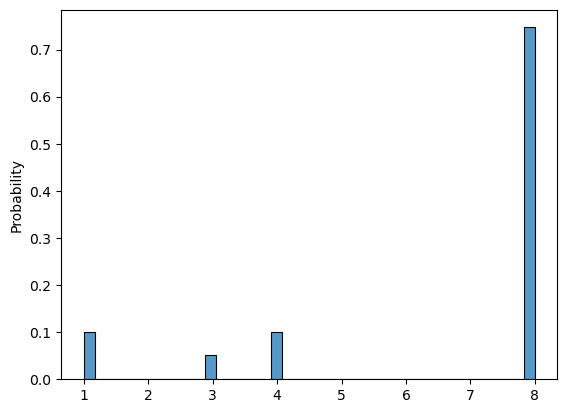

In [12]:
def loi_discrete():
    x = random()
    return 1 if x < 0.1 else 3 if x < 0.15 else 4 if x < 0.25 else 8
    
data = []
for _ in range(100000):
    data.append(loi_discrete())
sns.histplot(data, stat="probability")

Nombre moyen de comparaisons?

$$0.1\cdot 1+0.05\cdot 2+0.1\cdot 3+ 0.75\cdot 4 = 2.75$$

### Loi quelconque sur un ensemble fini de valeurs

---


$$ P = 
\begin{array}{l|llll}
 & 1 & 3 & 4 & 8 \\ \hline
\mathbb{P} & 0.1 & 0.05 & 0.1 & 0.75\\ 
\end{array}
$$

**Meilleur algorithme:**

<Axes: ylabel='Probability'>

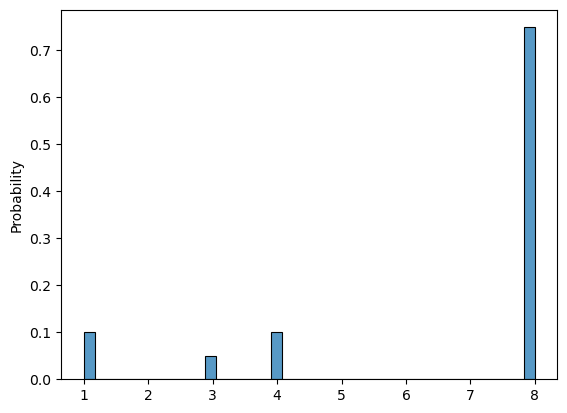

In [13]:
def loi_discrete():
    x = random()
    return 8 if x < 0.75 else 1 if x < 0.85 else 4 if x < 0.95 else 3
    
data = []
for _ in range(100000):
    data.append(loi_discrete())
sns.histplot(data, stat="probability")

Coût algorithmique moyen (nombre de comparaisons)?

$$0.75 \cdot 1+0.1\cdot 2+0.1\cdot 3+ 0.05\cdot 4 = 1.4$$

Amélioration possible: **méthode des alias**
* génération en temps constant après un précalcul en $O(n \log n)$, où $n$ est le nombre de valeurs différentes que peut prendre la variable aléatoire.

### Loi binomiale de paramètres $p$ et $n$

---

Nombre de Piles en $n$ lancers si la probabilité d'obtenir Pile est $p$ à chaque lancer.

$$  \forall k \in \{0, \dots, n \}, \mathbb{P}[X = k] = \binom{n}{k} p^k (1-p)^{n-k} $$


<Axes: ylabel='Probability'>

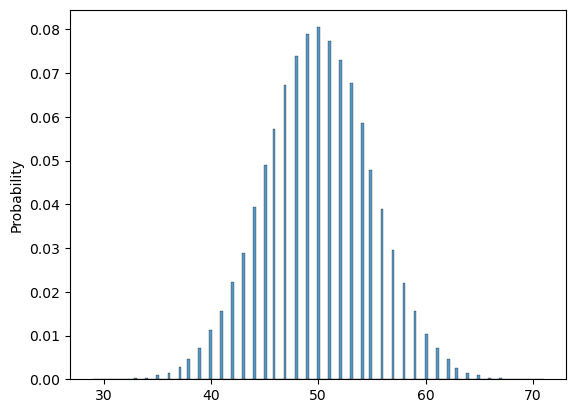

In [14]:
def binomiale(n, p):
    res = 0
    for _ in range(n):
        if random() < p:
            res += 1
    return res
    
data = []
for _ in range(100000):
    data.append(binomiale(100, 0.5))
sns.histplot(data, stat="probability")

Complexité? 

$$ O(n) $$

### Loi géométrique de paramètre $p$

---

Nombre de lancers avant d'obtenir Pile  si la probabilité d'obtenir Pile est $p$ à chaque lancer.

$$ \forall k \geq 1, \mathbb{P}[X = k] = (1-p)^{k-1} p $$


<Axes: ylabel='Probability'>

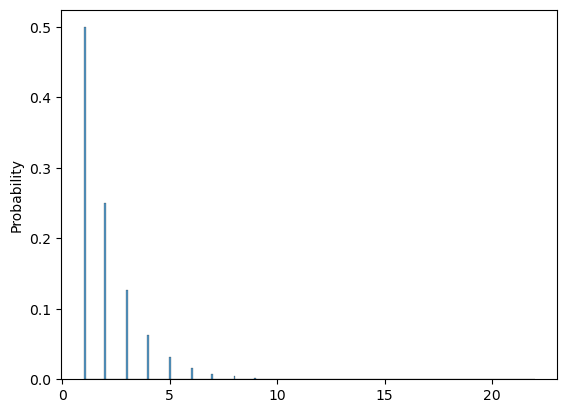

In [15]:
def geom(p):
    res = 1
    while random() > p:
        res += 1
    return res
    
data = []
for _ in range(100000):
    data.append(geom(0.5))
sns.histplot(data, stat="probability")

Complexité moyenne?

$$1 \cdot  \mathbb{P}[X = 1] + 2 \cdot  \mathbb{P}[X = 2] + \dots = \mathbb{E}[X] = \frac1p$$

Algo en temps constant vu en TD.

## Lois continues

---

* loi uniforme
* loi exponentielle
* loi normale

### Variable aléatoire réelle  à densité

---

* en général $\mathbb{P}[X = x] = 0$ pour tout $x \in \mathbb{R}$
* la loi peut être définie 
    * par sa **fonction de répartition** $F$
        $$\forall x \in \mathbb{R}, F(x) = \mathbb{P}[X \leq x] $$
    * par sa **fonction de densité** $f$ (supposant $F$ dérivable)
        $$\forall x \in \mathbb{R}, f(x) = F'(x) $$


**Exemple de la loi exponentielle de paramètre $\lambda$**

$$ \forall x \geq 0, F(x) = 1 - \exp(-\lambda x)$$
$$ \forall x \geq 0, f(x) = \lambda\exp(-\lambda x)$$
Ces fonctions valent 0 pour $x$ négatif.

### Fonction de densité

---

C'est l'équivalent de la  loi de probabilité dans le cas discret

* $f \geq 0$
* $\int_{z =-\infty}^{+\infty} f(z) dz = 1$

L'histogramme des valeurs "converge" vers la fonction de densité.

<Axes: ylabel='Density'>

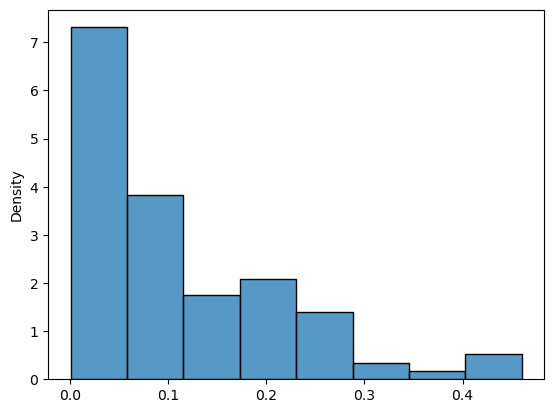

In [17]:
def expo(lam):
    return np.random.exponential(1/lam)
    
data = []
for _ in range(100):
    data.append(expo(10.0))
sns.histplot(data, stat="density")

### Fonction de répartition

---

* $F(x) = \int_{z =-\infty}^x f(z) dz$
* $\mathbb{P}[X \in [a, b]] = F(b) - F(a) $
* $F$ est croissante
* $\lim_{x \rightarrow - \infty} F(x) = 0$
* $\lim_{x \rightarrow + \infty} F(x) = 1$

### Fonction de répartition pour une variable aléatoire discrète

---

$$ P = 
\begin{array}{l|llll}
 & 1 & 3 & 4 & 8 \\ \hline
\mathbb{P} & 0.1 & 0.05 & 0.1 & 0.75\\ 
\end{array}
$$

$$
F(x) =
\left\{
\begin{array}{lr}
0 & \text{ si } x < 1 \\
0.1 & \text{ si } 1 \leq x < 3 \\
0.15 & \text{ si } 3 \leq x < 4 \\
0.25 & \text{ si } 4 \leq x < 8 \\
1 & \text{ si } 8 \leq x  \\
\end{array}
\right.
$$



La fonction de densité n'est pas définie dans ce cas, car la fonction de répartition n'est pas dérivable.

### Espérance d'une variable aléatoire à densité $f$

---

$$\mathbb{E}[X] =  \int_{z =-\infty}^{+\infty} zf(z) dz$$

et pour toute fonction réelle $g$ intégrable

$$\mathbb{E}[g(X)] =  \int_{z =-\infty}^{+\infty} g(z)f(z) dz$$

### Loi uniforme sur un intervalle $[a, b]$

---

Donner la fonction de densité, la fonction de répartition, la moyenne et un algorithme de génération.


* fonction de densité
$$ \forall x \in [a,b], f(x) = \frac{1}{b-a} $$
* fonction de répartition
$$ \forall x \in [a,b], F(x) = \frac{x-a}{b-a} $$
* espérance
$$\mathbb{E}[X] =  \frac{a+b}{2}$$
* algo de génération

<Axes: ylabel='Probability'>

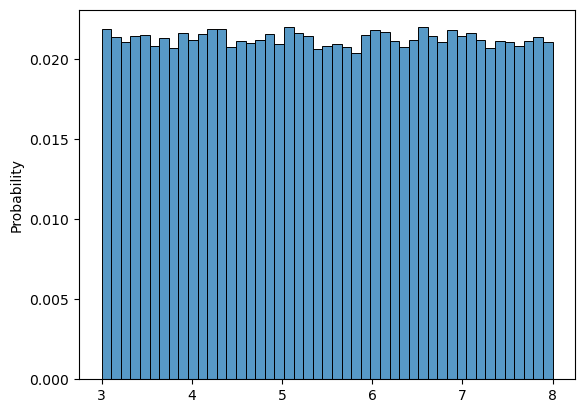

In [18]:
def unif(a, b):
    return random()*(b-a) + a
    
data = []
for _ in range(100000):
    data.append(unif(3,8))
sns.histplot(data, stat="probability")

#### Question

---

Quelle est la loi de la VA générée par l'algo suivant?

In [ ]:
def algo():
    return random()**2

data = []
for _ in range(100000):
    data.append(algo())
sns.histplot(data, stat="density")

* soit $X$ la VA générée par l'algo
* on a a $X = U^2$ où $U$ est une VA uniforme sur $[0,1]$
* on calcule la fonction de répartition pour $x \in [0,1]$

$$
\begin{array}{ll}
\mathbb{P}[X \leq x] & = \mathbb{P}[U^2 \leq x]\\
& = \mathbb{P}[U \leq \sqrt{x}]\\
& = \sqrt{x}
\end{array}
$$
donc 
* $F(x) = \sqrt{x}$
* $f(x) = \frac{1}{2 \sqrt{x}}$

### Loi exponentielle de paramètre $\lambda$

---

* fonction de répartition
$$ \forall x \geq 0, F(x) = 1 - \exp(-\lambda x)$$
* fonction de densité
$$ \forall x \geq 0, f(x) = \lambda\exp(-\lambda x)$$
* espérance
$$\mathbb{E}[X] =  \frac1\lambda$$


Modélise des durées entre des arrivées "indépendantes"
* temps moyen entre 2 arrivées $\frac1\lambda$
* taux d'arrivée $\lambda$
* loi "sans mémoire" comme la loi géométrique (en TD)

### Loi normale de paramètre $(\mu, \sigma^2)$

---


* fonction de densité
$$ \forall x \in \mathbb{R}, f(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp\left(- \frac{(x- \mu)^2}{2 \sigma^2}\right)$$
* fonction de répartition: pas de formulation par les fonctions usuelles
* espérance
$$\mathbb{E}[X] =  \mu$$
* limite de sommes de VA iid (théorème central limite)

<Axes: ylabel='Density'>

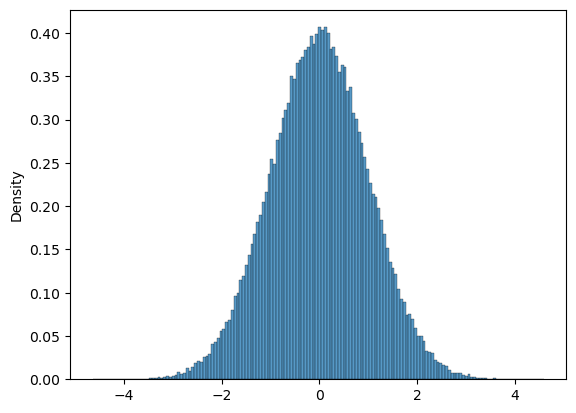

In [19]:
def normal():
    return np.random.normal(0,1)
    
data = []
for _ in range(100000):
    data.append(normal())
sns.histplot(data, stat="density")

### Densité de la somme de 2 VA indépendantes

---

* $X$ et $Y$ deux VA ayant les fonctions de densités $f_X$ et $f_Y$ respectivement
* $f_{X+Y}$ la fonction de  densité  de $X + Y$
* pourquoi $f_{X+Y} \neq f_X + f_Y$?

<Axes: ylabel='Density'>

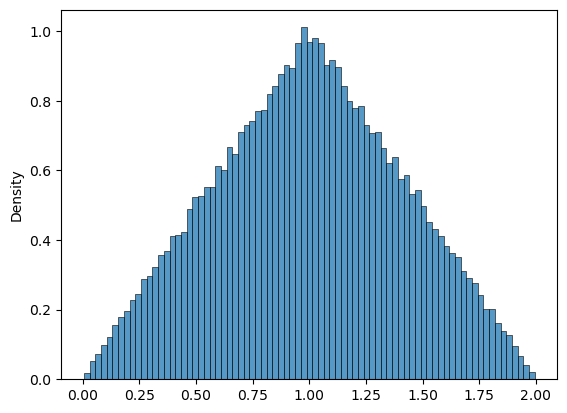

In [20]:
data = []
for _ in range(100000):
    data.append(random()+random())
sns.histplot(data, stat="density")

**Produit de convolution** (si $X$ et $Y$ sont indépendantes):


$$f_{X+Y}(x) = \int_{-\infty}^{+\infty} f_X(z) f_Y(x-z) dz$$

Si $X$ et $Y$ suivent des lois normales de paramètres $(\mu_X, \sigma_X^2)$ et $(\mu_Y, \sigma_Y^2)$ alors $X+Y$ suit la loi normale de paramètres $(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$.

## Algorithmes de génération de variables aléatoires

---

* inversion de la fonction de répartition

* méthode de rejet

### Inversion de la fonction de répartition

---


* soit $F: \mathbb{R}  \rightarrow [0,1]$ une fonction de répartition inversible
* on note $F^{-1}: [0,1] \rightarrow \mathbb{R}  $ la fonction inverse de $F$
* soit $X = F^{-1}(U)$, où $U$ est uniforme sur $[0,1]$
* calculer la fonction de répartition de $X$

$$
\begin{array}{ll}
\mathbb{P}[X \leq x] & = \mathbb{P}[F^{-1}(U) \leq x]\\
& = \mathbb{P}[U \leq F(x)]\\
& = F(x)
\end{array}
$$

Si $F$ est une fonction de répartition inversible, alors

**Algorithme de génération:** retourner $F^{-1}(U)$.

**Problème**: calculer $F^{-1}$

**Complexité algorithmique**: temps constant

### Inversion de la fonction de répartition: exemples

---

Loi **uniforme** sur $[a,b]$:

* $ F(x)= \frac{x-a}{b-a} $
* $ F^{-1}(y)= a + (b-a)y $

Loi **exponentielle** de paramètre $\lambda$:

* $ F(x)= 1 - \exp(- \lambda x) $
* $ F^{-1}(y) = - \frac{\ln(1-y)}{\lambda}$

### Méthode de rejet dans le cas discret

---

Vous disposez que d'une pièce bien équilibrée et vous voulez simuler un dé à 6 faces (obtenir une valeur uniforme entre 1 et 6). Comment faites-vous?



**Algorithme**: 
1. lancer 3 fois la pièce et lire le résultat en binaire avec
    * Pile vaut 1
    * Face vaut 0
2. on obtient un nombre uniforme entre 0 et 7
3. si nombre entre 1 et 6, on le retourne
4. sinon on rejette la valeur, et on recommence

Complexité?

En moyenne $\frac43$ lancers avant d'obtenir une valeur.

### Méthode de rejet dans le cas continu 

---


On se place dans le cas simple où la fonction de densité $f$ est
* définie sur un intervalle $[a,b]$
* son maximum est $M$

**Algorithme**:

1. Générer $X$ uniforme sur $[a,b]$
2. Générer $Y$ uniforme sur $[0,M]$
3. Si $Y \leq f(x)$ retourner $X$
4. Sinon rejetter $X$ et retourner au début


Complexité?

En moyenne $2M (b-a)$ générations uniformes pour obtenir une valeur.